# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [13]:
df

#difference in stock price
df['Diff']= df['Adj Close'].diff().shift(-1) #difference to the next period


#target variable, whether went up or down
df['Target']= np.sign(df['Diff'])

#Option premium
df['Premium']= .08 *df['Adj Close']

df

,Adj Close,diff,Diff,Target,Premium
Date,,,,,
1980-12-31,0.117887,-0.020296,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,0.016409,1.0,0.007842
...,...,...,...,...,...
2023-09-30,170.984741,-0.439423,-0.439423,-1.0,13.678779
2023-10-31,170.545319,19.404678,19.404678,1.0,13.643625
2023-11-30,189.949997,2.580002,2.580002,1.0,15.196000


In [14]:
df.head()

,Adj Close,diff,Diff,Target,Premium
Date,,,,,
1980-12-31,0.117887,-0.020296,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,0.016409,1.0,0.007842


# 3.) Pull in X data, normalized and build a LogReg on column 2

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [16]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [24]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [49]:
y

Date
1980-12-31   -1.0
1981-01-31   -1.0
1981-02-28   -1.0
1981-03-31    1.0
1981-04-30    1.0
             ... 
2023-05-31    1.0
2023-06-30    1.0
2023-07-31   -1.0
2023-08-31   -1.0
2023-09-30   -1.0
Freq: M, Name: Target, Length: 514, dtype: float64

In [26]:
logreg = LogisticRegression()

logreg.fit(X, y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [27]:
df['Predictions']= y_pred

In [46]:
df['Profit'] = 0.
#True Positives
df.loc[(df['Predictions']==1) & (df['Target'] == 1), 'Profit'] = df['Premium']

#False Positives
df.loc[(df['Predictions']==1) & (df['Target'] == -1), 'Profit'] = 100 * df['Diff'] + df['Premium']


In [47]:
df

,Adj Close,diff,Diff,Target,Premium,Predictions,Profit
Date,,,,,,,
1980-12-31,0.117887,-0.020296,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...,...
2023-05-31,176.778061,16.675507,16.675507,1.0,14.142245,1.0,14.142245
2023-06-30,193.453568,2.473389,2.473389,1.0,15.476285,1.0,15.476285
2023-07-31,195.926956,-8.304138,-8.304138,-1.0,15.674156,-1.0,0.000000


# 5.) Plot profits over time

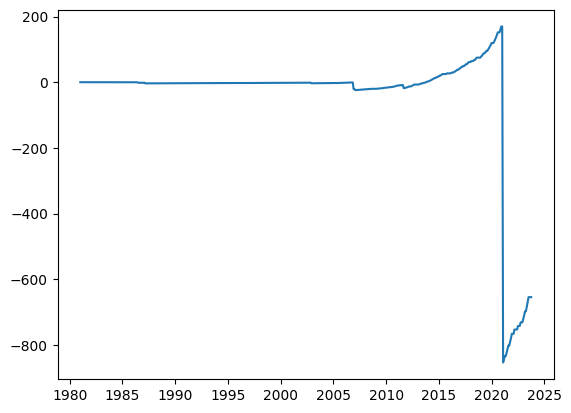

In [48]:
plt.plot(np.cumsum(df['Profit']))
plt.show()

In [ ]:
# detriment has been augmented by the covid, as it shows the horrible impact from covid into the lost

#train for data set

5.5.) Mr. Luis venture designate for people who pay for the ticket to acquires the right of joining a chat room, as being able to connect with KOL, or the "star" in particular small groups. It provides opportunity for people with common interest to join the chat. For us, our skills from MQE can leverge the data gathered from the webstie StarArena or from content creator could be sorted and trained through model for the purpose of specific enteracting. The data collected are used for future decision making, and we can perform logistic regression to filter which is the targeted interest for the web user.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.